# **IBM Data Science Capstone Project  - Week 1 Submission**

This notebook will be mainly used for the IBM Data Science Capstone project. 

In [272]:
import numpy as np

In [273]:
import pandas as pd

In [274]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


---

# **Segmenting and Clustering Neighborhoods in Toronto  - Week 3 Submission**

**Friendly reminder to my peer marking:**  
*Answers to section 1, 2 and 3 of Semgmenting & Clustering assignment are all in the same notebook. So the link that I share as part of submission will be the same for all three sections*

## Answer to Section 1 of the Assignment - week 3!

***Importing necessary libraries for assignment***

In [275]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#import folium # map rendering library
!pip install folium
import folium

print('Libraries imported successfully!')

Libraries imported successfully!


***Scrape the Wikipedia page "https: //en.wikipedia .org/wiki/List_of_postal_codes_of_Canada:_M" using BeautifulSoup methodology***

In [276]:
#Using Beautiful Soup to scrape Wikipedia page

# import the library, indicate url and access the info in free format
import urllib.request
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = urllib.request.urlopen(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")
all_tables=soup.find_all("table")
right_table=soup.find('table', class_='wikitable sortable')

# loop through the rows to obtain the necessary info
A=[]
B=[]
C=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))  

# intruce pandas and dataframe and display the first few rows
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C
df.head()

,Postal Code,Borough,Neighborhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


***We need to drop the "\n" from each cell, so we will use the following code***

In [277]:
# Prepare the data
df['Postal Code'] = df['Postal Code'].replace('\n','', regex=True)
df['Borough'] = df['Borough'].replace('\n','', regex=True)
df['Neighborhood'] = df['Neighborhood'].replace('\n','', regex=True)
df.head(5)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


***Check dataframe size***

In [278]:
df.shape

(180, 3)

***Removing any data with Borough = "Not assigned" as part of data preprocessing***

In [279]:
# Remove unassigned Boroughs from the list
index=df[df['Borough']=='Not assigned'].index
df.drop(index,inplace=True)
df.reset_index(drop=True,inplace=True)
print('Output for section 1 of assignment:')
df.head(12)

Output for section 1 of assignment:


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


***Reconfirm size of dataframe***

In [280]:
print(df.shape)

(103, 3)


### Answer to Section 2 of the Assignment - week 3!

***Since I had difficulty getting the geographical coordinates of the neighborhoods using the Geocoder package, 
I used the csv file that has the geographical coordinates of each postal code: http:// cocl.us/ Geospatial_data.***

***Please note: The geocoder was taking extra long time and it kept failing on me multiple times***

In [281]:
# Use the Geospatial data provided by the assignment as Geocoder failed on me
postal_code = "http://cocl.us/Geospatial_data"
df_PC = pd.read_csv(postal_code)
df_PC.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


***Merge the two data frame to obtained the desired format!***

In [282]:
neighborhoods = pd.merge(df, df_PC, on='Postal Code', how='inner')
print('Output for section 2 of assignment:')
neighborhoods.head(12)

Output for section 2 of assignment:


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


***Reconfirm the size of the full data frame***

In [283]:
neighborhoods.shape

(103, 5)

### Answer to Section 3 of the Assignment - week 3!

### A - Retrieve neighborhood dataframe

In [284]:
# Display first few rows of the fully merged dataframe that will be used for section 3 of assignment
neighborhoods.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [285]:
print('The Neighborhoods dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The Neighborhoods dataframe has 10 boroughs and 103 neighborhoods.


### B - Focus on Toronto

***Obtain those Boroughs with the name "Toronto"; calling it toronto_df***

In [286]:
# Create a Toronto neighborhood specific dataframe as instructed by assignment
toronto_df = neighborhoods[df['Borough'].astype(str).str.contains('Toronto')]
toronto_df.reset_index(drop=True,inplace=True)
toronto_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


***Obtain the size of the new data frame; toronto-df!***

In [287]:
toronto_df.shape

(39, 5)

In [288]:
print('The Neighborhoods dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]
    )
)

The Neighborhoods dataframe has 4 boroughs and 39 neighborhoods.


***Obtain geographical location of Toronto and areas around it***

In [289]:
# Obtain latitude and longitude of our toronto_df dataframe
address = 'toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


***Create a map of Toronto area based on newly created dataframe; toronto_df***

In [290]:
# create map of Toronto (toronto_df) using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto


***Define Foursquare Credentials and Version***

In [291]:
CLIENT_ID = '0PF0YB3GF5NICVPQJHKIEYFIBXCDABGTZB3VA2X2EPQGVJLP' # my Foursquare ID
CLIENT_SECRET = 'LSYXIHWGSUO1RVXEFTT4LWGCHCQ4NIX0KB1GSYAMJ15QMQRF' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0PF0YB3GF5NICVPQJHKIEYFIBXCDABGTZB3VA2X2EPQGVJLP
CLIENT_SECRET:LSYXIHWGSUO1RVXEFTT4LWGCHCQ4NIX0KB1GSYAMJ15QMQRF


***Create the GET request URL. Name your URL url.***

In [292]:
# Define criteria
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
   # neighborhood_latitude, 
    #neighborhood_longitude, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL
    

'https://api.foursquare.com/v2/venues/explore?&client_id=0PF0YB3GF5NICVPQJHKIEYFIBXCDABGTZB3VA2X2EPQGVJLP&client_secret=LSYXIHWGSUO1RVXEFTT4LWGCHCQ4NIX0KB1GSYAMJ15QMQRF&v=20180605&ll=43.6534817,-79.3839347&radius=1000&limit=100'

***Send the GET request and examine the resutls***

In [293]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff79a4eaca24934334ca6d7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 239,
  'suggestedBounds': {'ne': {'lat': 43.66248170900001,
    'lng': -79.37151886118865},
   'sw': {'lat': 43.64448169099999, 'lng': -79.39635053881135}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
  

***Extracts the category of the venue by calling the get_category_type***

In [294]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

***Convert the json file into pandas dataframe***

In [295]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Japango,Sushi Restaurant,43.655268,-79.385165
3,Indigo,Bookstore,43.653515,-79.380696
4,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684


***Check the dataframe to see how many venues were identified in toronto_df***

In [296]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


***Explore various neighborhoods of Toronto***

***Develop a functionm to seach each neighborhood and create a new dataframe for Toronto venues***

In [297]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [298]:
# display list of areas
toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )
print('successful!')

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


***Review the newly created venue dataframe and check its size***

In [299]:
# Display first few rows of all venues in our dataframe
print(toronto_venues.shape)
toronto_venues.head()

(3182, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,"Regent Park, Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
4,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center


***Confirm number of venues in each of the neighborhoods in Toronto***

In [300]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,100,100,100,100,100,100
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",48,48,48,48,48,48
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,100,100,100,100,100,100
Christie,100,100,100,100,100,100
Church and Wellesley,100,100,100,100,100,100
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,100,100,100,100,100,100


In [301]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 274 uniques categories.


### C - Analyzing neighborhoods in Toronto

***Let's analyze each neighborhood in our toronto_df dataframe***

In [302]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo,Accessories Store,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stationery Store,Steakhouse,Storage Facility,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [303]:
toronto_onehot.shape

(3182, 274)

***Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category***

In [304]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo,Accessories Store,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stationery Store,Steakhouse,Storage Facility,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,Berczy Park,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.00,0.00,0.00,0.020000,0.00,0.000000,0.00

In [305]:
toronto_grouped.shape

(39, 274)

***So what are the top 5 most common venues in each neighborhoods?***

In [306]:
# Get list of top 5 venues in each area
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                 venue  freq
0          Coffee Shop  0.12
1                 Café  0.06
2                Hotel  0.04
3  Japanese Restaurant  0.04
4                 Park  0.04


----Brockton, Parkdale Village, Exhibition Place----
         venue  freq
0         Café  0.07
1  Coffee Shop  0.06
2   Restaurant  0.06
3          Bar  0.05
4       Bakery  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0                Park  0.08
1         Pizza Place  0.06
2             Brewery  0.06
3         Coffee Shop  0.06
4  Italian Restaurant  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
             venue  freq
0  Harbor / Marina  0.13
1             Café  0.13
2      Coffee Shop  0.13
3   Scenic Lookout  0.07
4           Garden  0.07


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.10
1     Ra

***Format the data into a pandas dataframe for practicality***

In [307]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [308]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Coffee Shop,Café,Japanese Restaurant,Hotel,Park
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Restaurant,Bar,Furniture / Home Store
2,"Business reply mail Processing Centre, South C...",Park,Pizza Place,Brewery,Coffee Shop,Pet Store
3,"CN Tower, King and Spadina, Railway Lands, Har...",Coffee Shop,Café,Harbor / Marina,Garden,Scenic Lookout
4,Central Bay Street,Coffee Shop,Ramen Restaurant,Park,Diner,Café


### D - Clustering Toronto neighborhoods using toronto_df

***Identify the best number for k (number of clusters)***

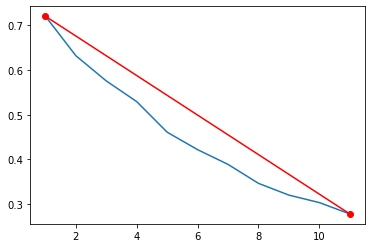

Optimum value of k =5


In [309]:
# import necessary library and packages
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
from pylab import rcParams
plt.plot(K,dist_points_from_cluster_center)
plt.plot([K[0],K[10]],[dist_points_from_cluster_center[0],
                       dist_points_from_cluster_center[10]],'ro-')
plt.show() # Display plot

# Perform calculations to identify the number of k
def calc_distance(x1,y1,a,b,c):
    d=abs((a * x1 + b * y1 + c))/(math.sqrt(a * a + b * b))
    return d

a= dist_points_from_cluster_center[0] - dist_points_from_cluster_center[10]
b=K[10] - K[0]
c1=K[0] * dist_points_from_cluster_center[10]
c2=K[10] * dist_points_from_cluster_center[0]
c=c1-c2

distance_of_points_from_line=[]
for k in range(11):
    distance_of_points_from_line.append(
    calc_distance(K[k],dist_points_from_cluster_center[k],a,b,c))

# display number of k (optimal number of clusters)
print("Optimum value of k =" +
     str(distance_of_points_from_line.index(max(
          distance_of_points_from_line))+1))

***Cluster Toronto neighborhoods into 5 clusters as identified above***

In [310]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 4, 1, 1, 0, 1, 1, 4, 4], dtype=int32)

***Create a new dataframe with clusters of Toronto neighborhood as well as top venues***

In [311]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto_df
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() 

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Café,Italian Restaurant,Park,Theater
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Park,Japanese Restaurant,Sushi Restaurant,Pizza Place
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Gastropub,Japanese Restaurant,Theater,Café
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Gastropub,Restaurant,Theater
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Pub,Coffee Shop,Pizza Place,Breakfast Spot,Beach


***Create a map and observe the clusters!***

In [312]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
#for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Output for section 3 of assignment:

### E - Examine Clusters


***1st Cluster - Pubs, Multicultural restaurants, Cafes***

In [313]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,East Toronto,0,Pub,Coffee Shop,Pizza Place,Breakfast Spot,Beach
7,Downtown Toronto,0,Korean Restaurant,Coffee Shop,Café,Grocery Store,Mexican Restaurant
11,West Toronto,0,Café,Restaurant,Bar,Vegetarian / Vegan Restaurant,Coffee Shop
12,East Toronto,0,Greek Restaurant,Café,Coffee Shop,Pub,Fast Food Restaurant
14,West Toronto,0,Café,Coffee Shop,Restaurant,Bar,Furniture / Home Store
15,East Toronto,0,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Beach,Restaurant
17,East Toronto,0,Coffee Shop,Brewery,Bar,Vietnamese Restaurant,American Restaurant
22,West Toronto,0,Café,Bar,Coffee Shop,Convenience Store,Thai Restaurant
24,Central Toronto,0,Café,Coffee Shop,Italian Restaurant,Vegetarian / Vegan Restaurant,Grocery Store
25,West Toronto,0,Coffee Shop,Café,Bar,Sushi Restaurant,Thai Restaurant


***2nd Cluster - Quick coffee shops and hangout places with friends / co-worksers***

In [314]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Downtown Toronto,1,Coffee Shop,Park,Japanese Restaurant,Sushi Restaurant,Pizza Place
2,Downtown Toronto,1,Coffee Shop,Gastropub,Japanese Restaurant,Theater,Café
3,Downtown Toronto,1,Coffee Shop,Café,Gastropub,Restaurant,Theater
5,Downtown Toronto,1,Coffee Shop,Café,Japanese Restaurant,Hotel,Park
6,Downtown Toronto,1,Coffee Shop,Ramen Restaurant,Park,Diner,Café
8,Downtown Toronto,1,Coffee Shop,Hotel,Café,Theater,Seafood Restaurant
10,Downtown Toronto,1,Coffee Shop,Café,Hotel,Japanese Restaurant,Park
13,Downtown Toronto,1,Coffee Shop,Hotel,Café,Japanese Restaurant,Restaurant
16,Downtown Toronto,1,Coffee Shop,Hotel,Café,Seafood Restaurant,Restaurant
32,Downtown Toronto,1,Coffee Shop,Café,Harbor / Marina,Garden,Scenic Lookout


***3rd Cluster - Park where you can go for a walk with your dog or just alone***

In [315]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
33,Downtown Toronto,2,Park,Coffee Shop,Grocery Store,Playground,BBQ Joint


***4th Cluster - Walking trail for jogging or cycling to stay healthy***

In [316]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
18,Central Toronto,3,Trail,Park,Bookstore,Gym / Fitness Center,Bus Line


***5th Cluster - Great mix of Coffee shops, grocery store, park and restaurant - great for families***

In [317]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Downtown Toronto,4,Coffee Shop,Café,Italian Restaurant,Park,Theater
9,West Toronto,4,Café,Coffee Shop,Park,Italian Restaurant,Sushi Restaurant
19,Central Toronto,4,Sushi Restaurant,Pharmacy,Coffee Shop,Café,Italian Restaurant
20,Central Toronto,4,Coffee Shop,Italian Restaurant,Dessert Shop,Restaurant,Pizza Place
21,Central Toronto,4,Park,Coffee Shop,Bank,Café,Italian Restaurant
23,Central Toronto,4,Coffee Shop,Italian Restaurant,Park,Thai Restaurant,Skating Rink
26,Central Toronto,4,Coffee Shop,Italian Restaurant,Sushi Restaurant,Café,Pizza Place
28,West Toronto,4,Coffee Shop,Café,Pizza Place,Bakery,Italian Restaurant
29,Central Toronto,4,Grocery Store,Italian Restaurant,Coffee Shop,Thai Restaurant,Park
31,Central Toronto,4,Coffee Shop,Sushi Restaurant,Italian Restaurant,Park,Thai Restaurant


**Conclusions**  
Below are the 5 clusters identified through this exercise. Based on this, I will be choosing to live in 5th cluster as I have a family  
    
1st Cluster - Pubs, Multicultural restaurants, Cafes  
2nd Cluster - Quick coffee shops and hangout places with friends / co-worksers  
3rd Cluster - Park where you can go for a walk with your dog or just alone  
4th Cluster - Walking trail for jogging or cycling to stay healthy  
5th Cluster - Great mix of Coffee shops, grocery store, park and restaurant - great for families  